In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import mysql.connector

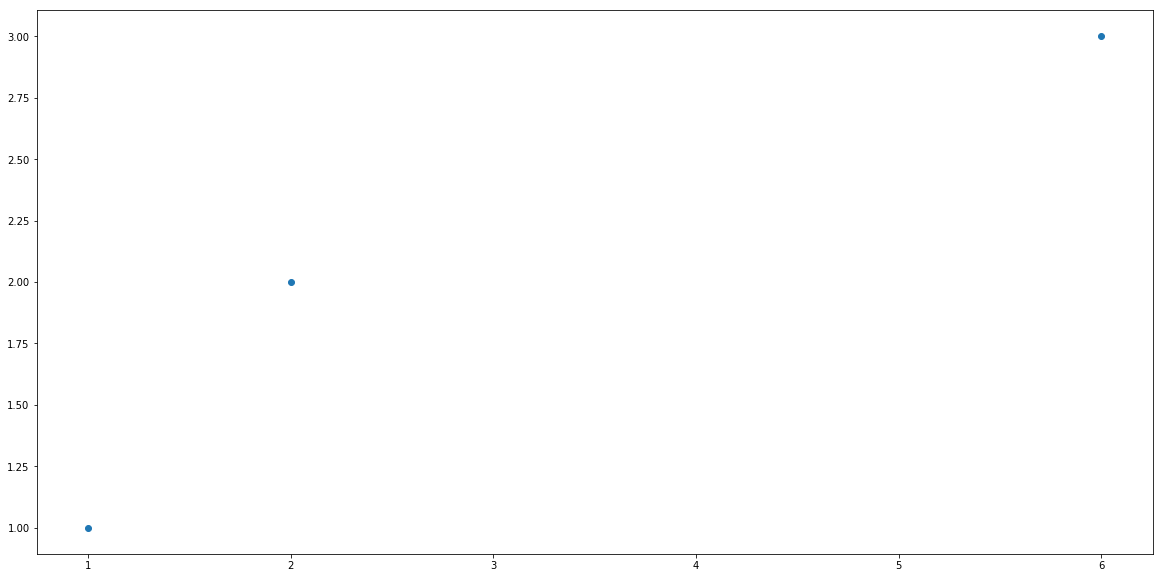

In [4]:
plt.figure(figsize=(20,10))
plt.scatter([1,2,6],[1,2,3])

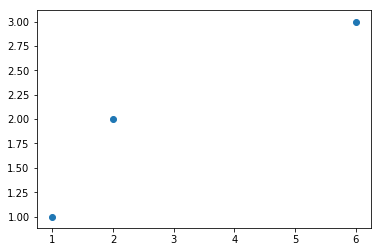

In [5]:
plt.scatter([1,2,6],[1,2,3])

In [6]:
login = {'user': 'khangly', 'password': '@HotSD98', 'database': 'khangly', 'host': 'localhost'}
db = mysql.connector.connect(**login)
cursor = db.cursor()

In [7]:
query = 'SELECT Time - Created, Views FROM Threads INNER JOIN ThreadRates ON Threads.ThreadID = ThreadRates.ThreadID'
cursor.execute(query)
data = cursor.fetchall()

In [8]:
data

[(9914, 320),
 (26355, 937),
 (26714, 943),
 (28094, 1196),
 (28633, 1294),
 (32294, 1508),
 (37034, 1812),
 (63014, 2419),
 (63615, 2520),
 (64035, 2694),
 (64634, 2811),
 (65114, 3043),
 (66074, 3440),
 (66914, 3609),
 (68594, 3996),
 (70335, 5111),
 (71415, 6030),
 (71595, 6030),
 (71714, 6030),
 (72194, 6491),
 (72194, 6491),
 (74054, 7598),
 (78558, 9288),
 (79036, 9466),
 (87014, 10667),
 (87014, 10667),
 (88094, 10767),
 (90134, 11084),
 (90255, 11084),
 (94334, 11900),
 (97033, 12686),
 (98714, 13102),
 (99314, 13281),
 (15017, 561),
 (29417, 731),
 (15018, 626),
 (16159, 626),
 (40818, 964),
 (4, 167),
 (12137, 389),
 (20897, 624),
 (21917, 686),
 (26538, 842),
 (27798, 993),
 (29178, 1175),
 (29597, 1206),
 (32660, 1399),
 (48258, 2009),
 (68239, 2433),
 (11237, 375),
 (16517, 486),
 (29596, 981),
 (109637, 1650),
 (116117, 1694),
 (393798, 1888),
 (508515, 1979),
 (62478, 943),
 (471617, 1318),
 (14416, 457),
 (30675, 728),
 (30857, 728),
 (9195, 342),
 (21015, 671),
 (4095,

In [9]:
query = 'SELECT Time - Created, Views FROM Threads INNER JOIN Posts ON Threads.ThreadID = Posts.ThreadID'
cursor.execute(query)
data.extend(cursor.fetchall())

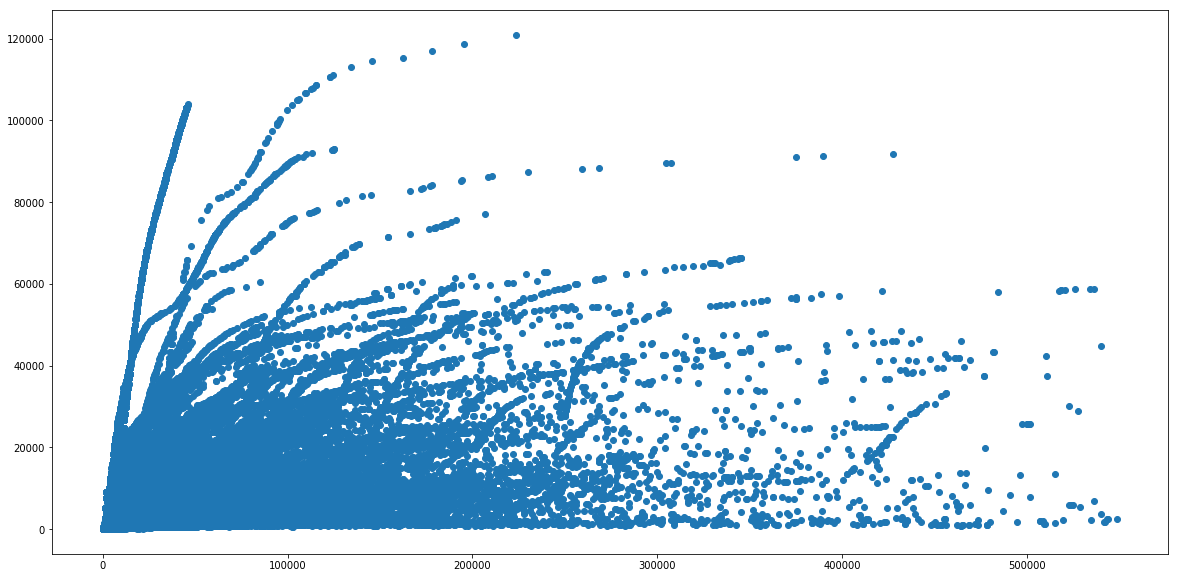

In [10]:
plt.figure(figsize=(20,10))
plt.scatter(*zip(*data))

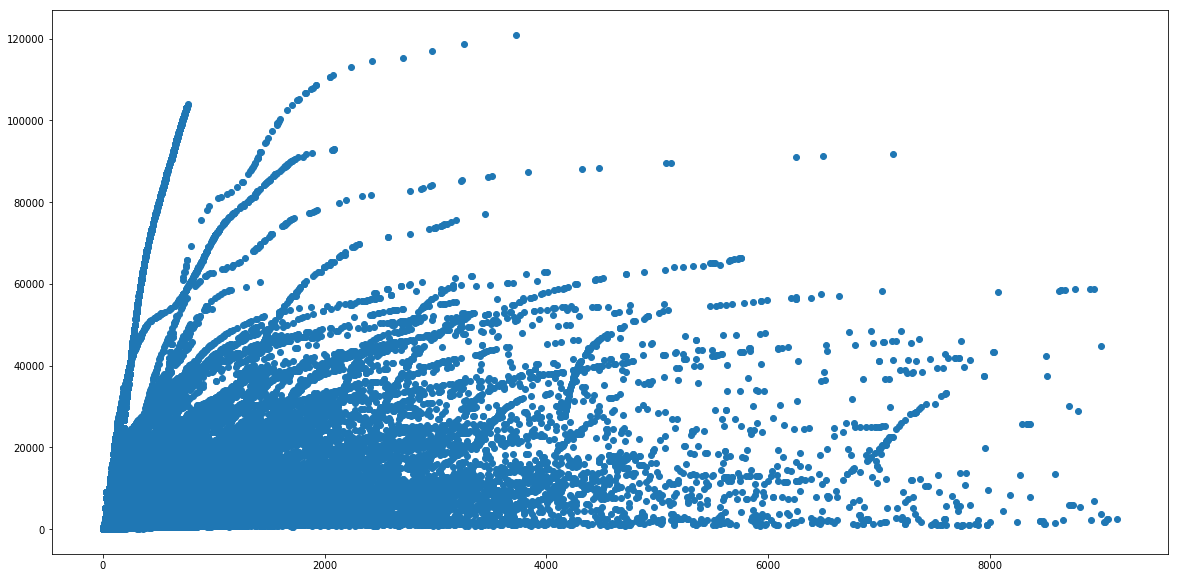

In [11]:
t = [d[0]/60 for d in data]
v = [d[1] for d in data]
plt.figure(figsize=(20,10))
plt.scatter(t,v)

In [12]:
data.sort(key=lambda x : x[0])

In [13]:
m = -1
tvdict = dict()
for tv in data:
    if int(tv[0] / (60 * 1)) > m:
        m = int(tv[0] / (60 * 1))
        tvdict[m] = [tv[1]]
    else:
        tvdict[m].append(tv[1])

In [14]:
x = list()
y = list()
for key, value in tvdict.items():
    x.append(key)
    y.append(np.percentile(value, 75))

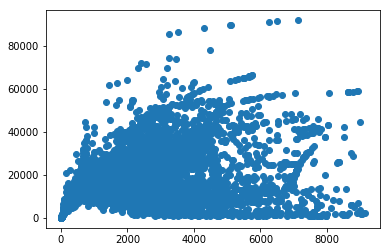

In [15]:
plt.scatter(x,y)

In [16]:
i = 0
for a in x:
    if a > 60:
        print(i)
        break
    i += 1

61


In [17]:
fit = np.polyfit(np.log(x[1:]), y[1:], 1)

In [18]:
z = fit[0] * np.log(x[1:]) + fit[1]

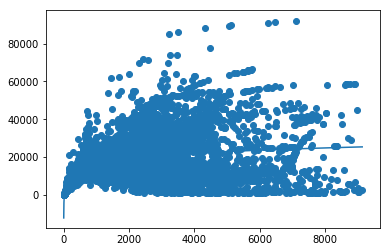

In [19]:
plt.plot(x[1:], z)
plt.scatter(x[1:], y[1:])

In [20]:
from scipy.optimize import curve_fit
def lg(x, a):
    return a * np.log(np.array(x)+1)

In [21]:
def lg2(x, a, b):
    return a * np.log(np.array(x)**b+1)
popt, pcov = curve_fit(lg2, x, y)

/home/khang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  


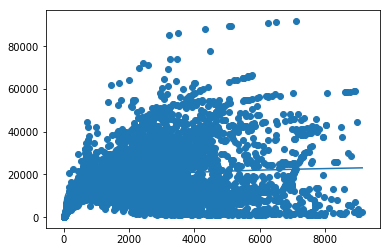

In [22]:
plt.plot(x, lg2(x, *popt))
plt.scatter(x, y)

In [23]:
z = lg2(x, *popt)
print(z)

[    0.            26.91738779  1754.10088748 ... 23057.61551297
 23060.12869319 23082.08237828]


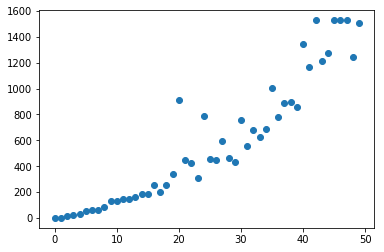

In [24]:
plt.scatter(x[:50], y[:50])

In [25]:
def ep(x, a, b):
    return a * (np.exp(np.array(x)*b)-1)

[1.36577374e+02 6.13713790e-02]


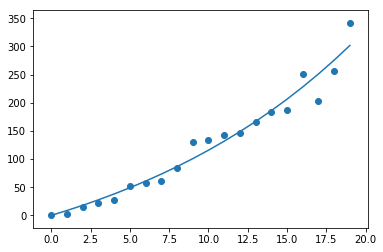

In [26]:
popt, pcov = curve_fit(ep, x[:20], y[:20])
z = ep(x[:20], *popt)
print(popt)
plt.plot(x[:20], z)
plt.scatter(x[:20], y[:20])

In [27]:
query = 'SELECT Time - Created, Scores FROM Threads INNER JOIN ThreadRates ON Threads.ThreadID = ThreadRates.ThreadID'
cursor.execute(query)
data2 = cursor.fetchall()
query = 'SELECT Time - Created, Scores FROM Threads INNER JOIN Posts ON Threads.ThreadID = Posts.ThreadID'
cursor.execute(query)
data2.extend(cursor.fetchall())

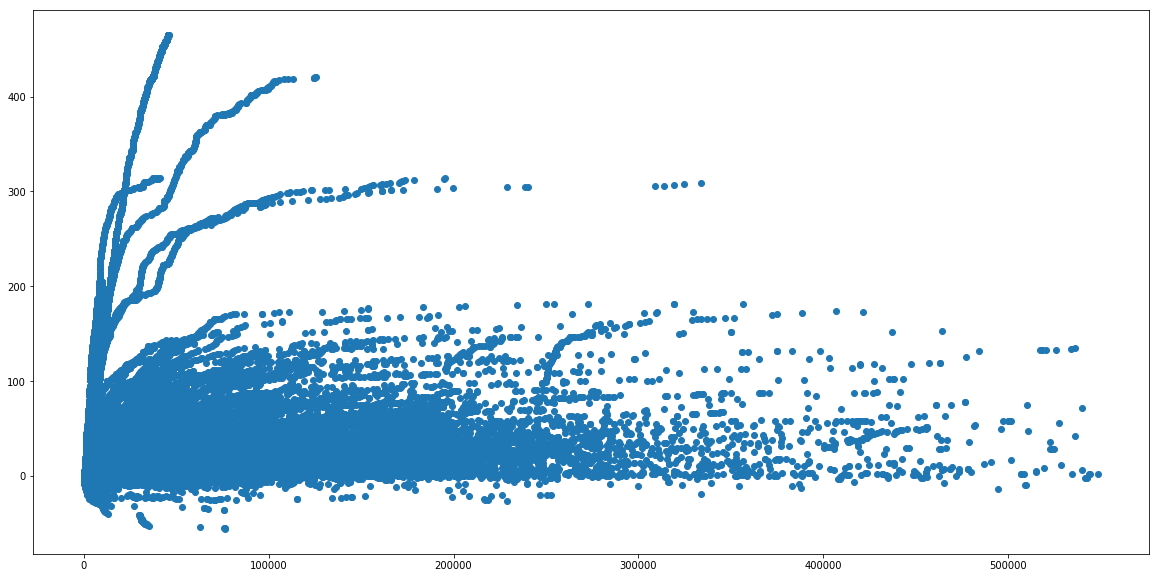

In [28]:
t2 = [d[0] for d in data2]
v2 = [d[1] for d in data2]
plt.figure(figsize=(20,10))
plt.scatter(t2,v2)

In [29]:
data2.sort(key=lambda x : x[0])
m = -1
tvdict2 = dict()
for tv in data2:
    if int(tv[0] / (60 * 1)) > m:
        m = int(tv[0] / (60 * 1))
        tvdict2[m] = [tv[1]]
    else:
        tvdict2[m].append(tv[1])

In [30]:
x2 = list()
y2 = list()
for key, value in tvdict2.items():
    x2.append(key)
    y2.append(np.percentile(value, 75))

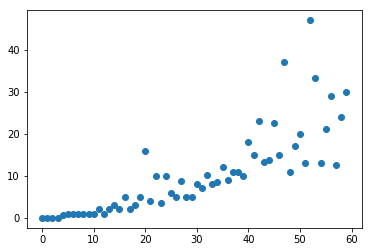

In [31]:
plt.scatter(x2[:60], y2[:60])

[0.26707644]


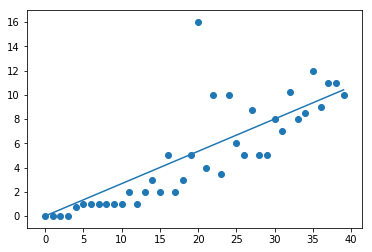

In [32]:
def plft(x, a):
    return a * np.array(x)
popt, pcov = curve_fit(plft, x2[:40], y2[:40])
z2 = plft(x[:40], *popt)
print(popt)
plt.plot(x2[:40], z2)
plt.scatter(x2[:40], y2[:40])

(4849,)
[1.83297351e+01 1.21576162e-02]


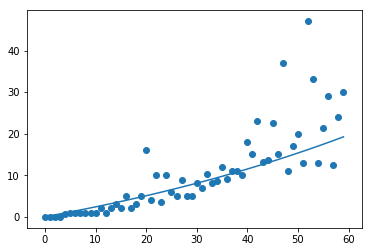

In [33]:
popt, pcov = curve_fit(ep, x2[:30], y2[:30])
z2 = ep(x2, *popt)
print(z2.shape)
print(popt)
plt.plot(np.array(x2[:60]), z2[:60])
plt.scatter(x2[:60], y2[:60])

In [34]:
z2 = popt[0] * (np.exp(np.array(x2)*popt[1])-1)
len(z2)

4849

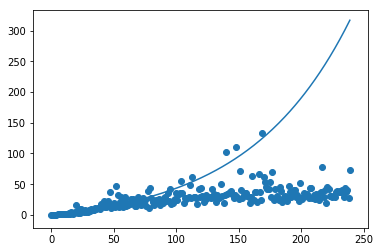

In [35]:
plt.plot(np.array(x2[:240]), z2[:240])
plt.scatter(x2[:240], y2[:240])

In [36]:
import pandas as pd

In [37]:
views = pd.read_sql_query('SELECT * FROM ThreadRates',db)

In [38]:
views.head()

,ThreadRateID,ThreadID,Scores,Replies,Views,Time
0,74281042,13122766,1,1,167,1559553409
1,74281246,13122823,0,0,187,1559556543
2,74281300,13122811,0,3,349,1559557503
3,74281309,13122811,-2,3,360,1559557743
4,74281342,13122844,0,0,38,1559558103


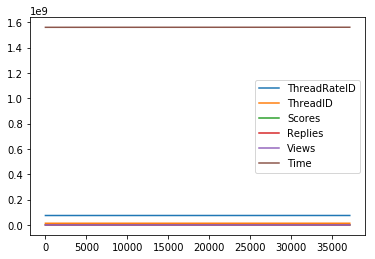

In [39]:
views.plot()

In [40]:
viewst = views.set_index('Time')

In [41]:
viewst.head()

,ThreadRateID,ThreadID,Scores,Replies,Views
Time,,,,,
1559553409,74281042,13122766,1,1,167
1559556543,74281246,13122823,0,0,187
1559557503,74281300,13122811,0,3,349
1559557743,74281309,13122811,-2,3,360
1559558103,74281342,13122844,0,0,38


In [42]:
threads = pd.read_sql_query('SELECT * FROM Threads',db)

In [43]:
views.Time -= 1

In [44]:
views.Time += 1

In [45]:
views.head()

,ThreadRateID,ThreadID,Scores,Replies,Views,Time
0,74281042,13122766,1,1,167,1559553409
1,74281246,13122823,0,0,187,1559556543
2,74281300,13122811,0,3,349,1559557503
3,74281309,13122811,-2,3,360,1559557743
4,74281342,13122844,0,0,38,1559558103


In [46]:
query_tr = 'SELECT Threads.ThreadID, Scores, Views, Replies, Time - Created AS Time FROM ThreadRates INNER JOIN Threads ON Threads.ThreadID = ThreadRates.ThreadID'
query_p = 'SELECT Threads.ThreadID, Scores, Views, Replies, Time - Created AS Time FROM Posts INNER JOIN Threads ON Threads.ThreadID = Posts.ThreadID'
infodf = pd.concat([pd.read_sql_query(query_tr, db), pd.read_sql_query(query_p, db)])
infodf.head()

,ThreadID,Scores,Views,Replies,Time
0,13122736,0,320,1,9914
1,13122736,2,937,1,26355
2,13122736,3,943,3,26714
3,13122736,4,1196,3,28094
4,13122736,6,1294,3,28633


In [47]:
len(infodf)

65014

In [48]:
info_by_time = infodf.set_index('Time')

In [49]:
info_by_time.head()

,ThreadID,Scores,Views,Replies
Time,,,,
9914,13122736,0,320,1
26355,13122736,2,937,1
26714,13122736,3,943,3
28094,13122736,4,1196,3
28633,13122736,6,1294,3


In [50]:
info_by_time.sort_index()

,ThreadID,Scores,Views,Replies
Time,,,,
0,13125709,0,0,0
0,13130254,0,0,0
0,13124923,0,1,0
0,13136035,0,0,0
0,13128490,0,0,0
0,13130293,0,0,0
0,13130320,0,0,0
0,13134508,1,0,0
0,13123810,0,0,0


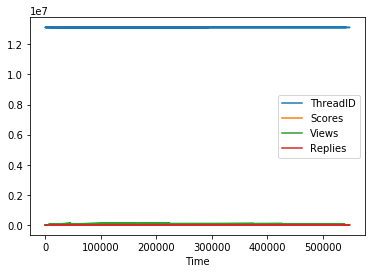

In [51]:
info_by_time.plot()

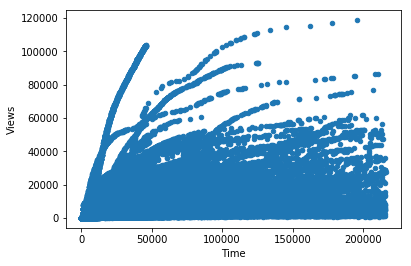

In [52]:
infodf[infodf.Time < 60*3600].plot.scatter(x='Time', y='Views')

In [53]:
info_by_time.describe()

,ThreadID,Scores,Views,Replies
count,6.501400e+04,65014.000000,65014.000000,65014.000000
mean,1.312969e+07,34.861707,9541.640708,36.707771
std,4.074388e+03,57.802859,13980.021579,81.705055
min,1.312274e+07,-56.000000,0.000000,0.000000
25%,1.312610e+07,5.000000,1158.250000,4.000000
50%,1.312971e+07,18.000000,4270.000000,15.000000
75%,1.313299e+07,39.000000,11789.000000,37.000000
max,1.313708e+07,465.000000,120924.000000,919.000000


In [54]:
info_copy = infodf.copy()

In [55]:
info_copy['Minute'] = (info_copy.Time/60).astype(int)

In [56]:
info_copy.head()

,ThreadID,Scores,Views,Replies,Time,Minute
0,13122736,0,320,1,9914,165
1,13122736,2,937,1,26355,439
2,13122736,3,943,3,26714,445
3,13122736,4,1196,3,28094,468
4,13122736,6,1294,3,28633,477


In [57]:
group = info_copy.groupby('Minute')

In [58]:
high_views = group['Views'].quantile(0.75)

In [59]:
high_views.head()

Minute
0     0.0
1     2.0
2    14.5
3    22.0
4    27.0
Name: Views, dtype: float64

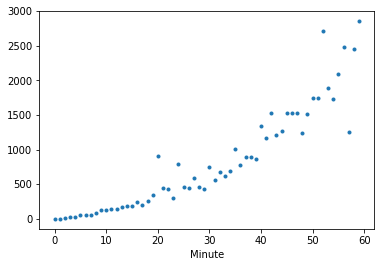

In [60]:
high_views[:60].plot(style='.')

In [61]:
popt, pcov = curve_fit(ep, high_views.index[:44], high_views[:44])
print(popt)

[2.68091005e+02 4.09802591e-02]


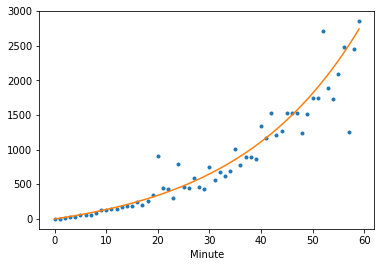

In [62]:
high_views[:60].plot(style='.')
curve = ep(high_views.index[:60], *popt)
plt.plot(np.array(high_views.index[:60]), curve)

In [63]:
high_scores = group['Scores'].quantile(0.75)
high_scores.head()

Minute
0    0.00
1    0.00
2    0.00
3    0.00
4    0.75
Name: Scores, dtype: float64

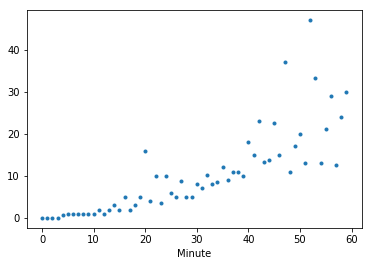

In [64]:
high_scores[:60].plot(style='.')

In [65]:
popt, pcov = curve_fit(ep, high_scores.index[:37], high_scores[:37])
print(popt)

[1.88385861e+01 1.18323131e-02]


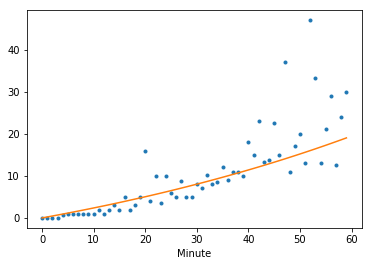

In [66]:
high_scores[:60].plot(style='.')
curve_scores = ep(high_scores.index[:60], *popt)
plt.plot(np.array(high_scores.index[:60]), curve_scores)

In [67]:
curve_scores

array([ 0.        ,  0.224228  ,  0.4511249 ,  0.68072246,  0.91305282,
        1.14814852,  1.38604246,  1.62676796,  1.87035872,  2.11684884,
        2.36627283,  2.61866561,  2.87406252,  3.13249932,  3.39401218,
        3.65863772,  3.926413  ,  4.19737549,  4.47156314,  4.74901433,
        5.02976792,  5.31386319,  5.60133994,  5.8922384 ,  6.18659932,
        6.48446388,  6.78587381,  7.0908713 ,  7.39949905,  7.71180027,
        8.02781868,  8.34759854,  8.6711846 ,  8.99862217,  9.3299571 ,
        9.66523577, 10.00450513, 10.34781268, 10.69520647, 11.04673515,
       11.40244793, 11.76239462, 12.1266256 , 12.49519188, 12.86814505,
       13.24553733, 13.62742156, 14.0138512 , 14.40488035, 14.80056377,
       15.20095684, 15.60611563, 16.01609685, 16.43095792, 16.85075691,
       17.27555259, 17.70540445, 18.14037265, 18.58051811, 19.02590243])

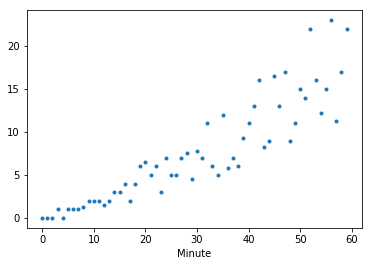

In [68]:
high_replies = group['Replies'].quantile(0.75)
high_replies.head()
high_replies[:60].plot(style='.')

In [69]:
popt, pcov = curve_fit(ep, high_replies.index[:37], high_replies[:37])
print(popt)

[3.04563225e+01 6.80113477e-03]


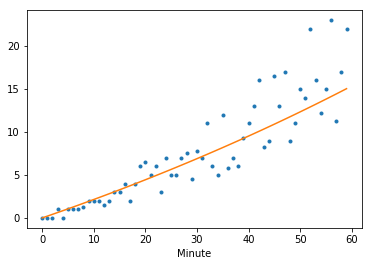

In [70]:
high_replies[:60].plot(style='.')
curve_replies = ep(high_replies.index[:60], *popt)
plt.plot(np.array(high_replies.index[:60]), curve_replies)

In [92]:
def getCurve(kind, limit, data, percentile):
    def ep(x, a, b):
        return a * (np.exp(x * b) - 1)
    minutes = data[kind].quantile(percentile)
    popt, pcov = curve_fit(ep, minutes.index[:limit], minutes[:limit])
    minutes[:60].plot(style='.')
    curve = ep(minutes.index[:60], *popt)
    
    
    textstr = r'$y = %.2fe^{%.2f x}$' % (popt[0], popt[1]*60)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.95, textstr, verticalalignment='top', bbox=props, transform=plt.gca().transAxes)
    
    plt.plot(minutes.index[:60], curve)
    return popt

array([3.04563225e+01, 6.80113477e-03])

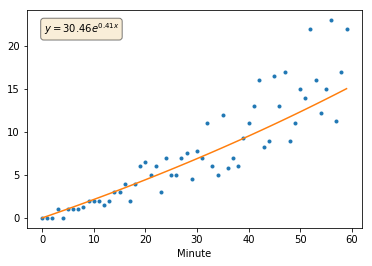

In [93]:
getCurve('Replies', 37, group, .75)

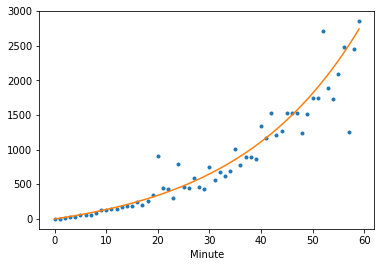

In [73]:
eppav = getCurve('Views', 44, group, .75)